# Обзор и обработка данных датафрейма.

In [ ]:
# грузим пандас, грузим датафрейм
import pandas as pd
dataframe = pd.read_excel('C://Users/Uldum/Downloads/result_roles.xlsx')

In [3]:
# оценим датафрейм, выведем общую информацию
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76382 entries, 0 to 76381
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                76382 non-null  int64 
 1   id                        76382 non-null  int64 
 2   premium                   76382 non-null  bool  
 3   name                      76382 non-null  object
 4   department                4902 non-null   object
 5   has_test                  76380 non-null  object
 6   response_letter_required  76382 non-null  object
 7   area                      76381 non-null  object
 8   salary                    40874 non-null  object
 9   type                      76379 non-null  object
 10  published_at              76380 non-null  object
 11  created_at                76381 non-null  object
 12  archived                  76380 non-null  object
 13  insider_interview         570 non-null    object
 14  url                   

In [ ]:
В основно все столбцы имеют тип данных Object, что не очень удобно для анализа численных значений. Некоторые колонки имеют
плохо воспринимаемый вид. Ппробуем преобразовать данные.

In [8]:
# проверим данные на явно незаполненные ячейки.
dataframe.isna().sum()

Unnamed: 0                      0
id                              0
premium                         0
name                            0
department                  71480
has_test                        2
response_letter_required        0
area                            1
salary                      35508
type                            3
published_at                    2
created_at                      1
archived                        2
insider_interview           75812
url                             2
alternate_url                   0
relations                       1
employer                        0
snippet                         1
schedule                        1
working_days                    1
working_time_intervals          0
working_time_modes              0
accept_temporary                1
description                     0
experience                      0
key_skills                      1
specializations                 0
region                          0
Unnamed: 29   

In [11]:
# те же незаполненные данные в столбцах, но в процентном виде.
dataframe.isna().mean()*100

Unnamed: 0                   0.000000
id                           0.000000
premium                      0.000000
name                         0.000000
department                  93.582258
has_test                     0.002618
response_letter_required     0.000000
area                         0.001309
salary                      46.487392
type                         0.003928
published_at                 0.002618
created_at                   0.001309
archived                     0.002618
insider_interview           99.253751
url                          0.002618
alternate_url                0.000000
relations                    0.001309
employer                     0.000000
snippet                      0.001309
schedule                     0.001309
working_days                 0.001309
working_time_intervals       0.000000
working_time_modes           0.000000
accept_temporary             0.001309
description                  0.000000
experience                   0.000000
key_skills  

In [ ]:
В целом, основные столбцы заполнены почти полностью. Кроме столбца зарплат 'salary'. При использовании данной колонки в анализе
нужно это учитывать. 

# Изменяем колонку ключевых навыков на более читаемую

In [12]:
# выводим посмотреть структуру записи строки в изначальном формате
dataframe['key_skills'][1]

"[{'name': 'SQL'}, {'name': 'Linux'}, {'name': 'Информационная безопасность'}, {'name': 'Работа с базами данных'}, {'name': 'Базы данных'}]"

In [13]:
# грузим json и пытаемся перевести в формат списка словарей одну строку для пробы, убрав лишние символы
import json
alp = json.loads(dataframe['key_skills'][1].replace("'", '"'))

In [14]:
# пробуем на одной строке вывести список навыков в нужном формате, выдергивая их из списка словарей
skills_list = [alp[i]['name'] for i in range(len(alp))]
skills_list

['SQL',
 'Linux',
 'Информационная безопасность',
 'Работа с базами данных',
 'Базы данных']

In [21]:
# заполняем пустые значения колонки 'ключевые навыки' пустыми списками
dataframe['key_skills'] = dataframe['key_skills'].fillna('[]')
dataframe['key_skills'].head(10)

0                                                   []
1    [{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...
2                                                   []
3                                                   []
4    [{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...
5    [{'name': 'Медиапланирование'}, {'name': 'Инте...
6    [{'name': 'Бизнес-анализ'}, {'name': 'Организа...
7                                                   []
8    [{'name': 'Подбор недвижимости по запросу клие...
9    [{'name': 'ИП Лукова Надежда Николаевна'}, {'n...
Name: key_skills, dtype: object

In [22]:
# создаём и применяем функцию для перевода строк в словарный формат
def text_to_json(text):
  try:
#     грузим каждую строку в виде json, попутно убирая лишние символы
    return json.loads(text.replace('"', '').replace("'", '"'))
  except:
    return []
dataframe['key_skills_json'] = dataframe['key_skills'].apply(text_to_json)

In [23]:
# выводим посмотреть что получилось после перевода в формат словарей
appl = dataframe['key_skills_json'][1]
appl

[{'name': 'SQL'},
 {'name': 'Linux'},
 {'name': 'Информационная безопасность'},
 {'name': 'Работа с базами данных'},
 {'name': 'Базы данных'}]

In [24]:
# пробуем написать выражение для вывода из списка словарей навыков - списка навыков
[appl[i]['name'] for i in range(len(appl))]

['SQL',
 'Linux',
 'Информационная безопасность',
 'Работа с базами данных',
 'Базы данных']

In [25]:
# создаём и применяем функцию к колонке навыков
def skills(text):
    try:
#         возвращает i элемент последовательности из списка словарей, выводит значение по ключу name
        return [text[i]['name'] for i in range(len(text))]
    except: 
        return []
dataframe['key_skills_json'] = dataframe['key_skills_json'].apply(skills)

In [26]:
# выводим колонку со скилами посмотреть
dataframe['key_skills_json'].head(10)

0                                                   []
1    [SQL, Linux, Информационная безопасность, Рабо...
2                                                   []
3                                                   []
4                    [Git, SQL, Тестирование, C#, API]
5    [Медиапланирование, Интернет-реклама, Реклама,...
6    [Бизнес-анализ, Организаторские навыки, Бизнес...
7                                                   []
8    [Подбор недвижимости по запросу клиента, Втори...
9    [ИП Лукова Надежда Николаевна, Телефонные пере...
Name: key_skills_json, dtype: object

# Дроп дубликатов строк

In [27]:
# просматриваем колонки для оценки целесообразности включения в список дропа дубликатов
dataframe[['region']].value_counts().head(10)

region               
Москва                   21793
Санкт-Петербург           8938
Краснодарский край        3468
Свердловская область      2953
Республика Татарстан      2700
Новосибирская область     2687
Московская область        2686
Нижегородская область     2060
Ростовская область        1853
Самарская область         1728
dtype: int64

In [29]:
# дропаем дубликаты по общим колонкам: названию вакансии, компании, городе 
dataframe.drop_duplicates(subset=['name', 'department', 'area']).head(10)

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,key_skills_json
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,1,54252278,False,Пентестер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[SQL, Linux, Информационная безопасность, Рабо..."
2,2,54428119,False,Асессор-тестировщик,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,3,54429041,False,Тестировщик (асессор),NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,4,54653519,False,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Git, SQL, Тестирование, C#, API]"
5,5,53099198,False,SMM-копирайтер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 45000, 'to': 45000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Медиапланирование, Интернет-реклама, Реклама,..."
6,6,48470813,False,Исполнительный директор (IT-сфера),NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Бизнес-анализ, Организаторские навыки, Бизнес..."
7,7,48478746,False,Руководитель IT-проектов/Аналитик,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
8,8,54784535,False,Специалист по недвижимости,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 60000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Подбор недвижимости по запросу клиента, Втори..."
9,9,53611360,False,Стажер/ученик риелтора,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 60000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ИП Лукова Надежда Николаевна, Телефонные пере..."


# Делаем колонку зарплат более читаемой.

In [30]:
# заполняем пустые значения пустыми списками и выводим посмотреть структуру строки колонки в 4 элементе
dataframe['salary'] = dataframe['salary'].fillna('[]')
dataframe['salary'][4]

"{'from': 25000, 'to': 50000, 'currency': 'RUR', 'gross': True}"

In [31]:
# просто смотрим, пытаемся вывести нужные элементы строки зарплат
appli = dataframe['salary'][4].split()
appli[5]

"'RUR',"

In [32]:
# пишем функцию для преобразования строки зарплат из записи json в среднюю зарплату и применяем функцию
def txt_to_json(text):
#     пытаемся вернуть измененную строку по условию, если валюта RUR, то зарплата в рублях, если другая, то условно
# умножаем на курс 60 рублей. Если редко попадётся другая валюта (напр. казахская), то пренебрежём этим фактом
  try:  
    if text.split()[5]=="'RUR',":
#         сплитим каждую строку в список, вызываем нужные элементы списка, убираем запятую, меняем тип данных на инт, складываем,
# делим на 2
        return (int(text.split()[1].replace (",", ""))+int(text.split()[3].replace (",", "")))/2
    else:
#        здесь то же, что и выше, только умножаем на условный средний курс USD/EUR в 60 рублей за УЕ
        return (int(text.split()[1].replace (",", ""))+int(text.split()[3].replace (",", "")))*60/2
# если что-то пошло не так, возвращаем пустой список
  except:
    return []
# применяем функцию ко всей колонке
dataframe['salary_json'] = dataframe['salary'].apply(txt_to_json)
# выводим количество значений средних зарплат
dataframe['salary_json'].value_counts().head(10)

[]          58310
50000.0       652
100000.0      538
60000.0       532
70000.0       505
45000.0       505
40000.0       501
55000.0       464
75000.0       448
65000.0       429
Name: salary_json, dtype: int64

# Обработка колонки штатного расписания.

In [33]:
# оценим колонку 'schedule', попробуем привести её в нормальный вид.
dataframe['schedule'].head(10)

0    {'id': 'remote', 'name': 'Удаленная работа'}
1        {'id': 'fullDay', 'name': 'Полный день'}
2    {'id': 'remote', 'name': 'Удаленная работа'}
3    {'id': 'remote', 'name': 'Удаленная работа'}
4        {'id': 'fullDay', 'name': 'Полный день'}
5        {'id': 'fullDay', 'name': 'Полный день'}
6        {'id': 'fullDay', 'name': 'Полный день'}
7        {'id': 'fullDay', 'name': 'Полный день'}
8     {'id': 'flexible', 'name': 'Гибкий график'}
9        {'id': 'fullDay', 'name': 'Полный день'}
Name: schedule, dtype: object

In [34]:
# заполняем пустые ячейки в колонке
dataframe['schedule'] = dataframe['schedule'].fillna('[]')
dataframe['schedule'].isna().value_counts()

False    76382
Name: schedule, dtype: int64

In [35]:
# посмотрим на структуру строки 
dataframe['schedule'][4]

"{'id': 'fullDay', 'name': 'Полный день'}"

In [36]:
# сплитим строку в список
dataframe['schedule'][4].split()

["{'id':", "'fullDay',", "'name':", "'Полный", "день'}"]

In [37]:
# выводим первый эелемент, убираем лишние символы
dataframe['schedule'][4].split()[1].replace("'", "").replace(",", "")

'fullDay'

In [38]:
# пишем функцию для подобного преобразования ко всему столбцу 'schedule' и применяем 
def dict_to_json(text):
  try:  
    return text.split()[1].replace("'", "").replace(",", "")
  except:
    return []

dataframe['schedule_json'] = dataframe['schedule'].apply(dict_to_json)
# выводим посмотреть какие типы графика работ остались и сколько их
dataframe['schedule_json'].value_counts()

fullDay        57876
remote         12405
flexible        4403
shift           1405
flyInFlyOut      288
[]                 2
опыт               1
Соловьева          1
228268             1
Name: schedule_json, dtype: int64

In [23]:
Предварительный вывод:
    Основные преобразования данных закончены, можно переходить к этапу непосредственно анализа данных. Небольшой план анализа:
+по имеющимся данным можно провести анализ требований работодателей к IT-специалистам по наиболее (топ-10) востребованным специальностям,
+также выделить регионы с наибольшим числом вакансий и зарплат (топ-10 регионв и зарплат)
+привести колонку schedule в читаемый вид и проанализировать кол-во IT вакансий (топ-5) на предмет штатного расписания
+провести анализ зарплат (медианная) по топ-10 вакансиям

In [63]:
# смотрим на обновленный датафрейм, пробуем выделить требования на топ-10 вакансий.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76382 entries, 0 to 76381
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                76382 non-null  int64 
 1   id                        76382 non-null  int64 
 2   premium                   76382 non-null  bool  
 3   name                      76382 non-null  object
 4   department                4902 non-null   object
 5   has_test                  76380 non-null  object
 6   response_letter_required  76382 non-null  object
 7   area                      76381 non-null  object
 8   salary                    76382 non-null  object
 9   type                      76379 non-null  object
 10  published_at              76380 non-null  object
 11  created_at                76381 non-null  object
 12  archived                  76380 non-null  object
 13  insider_interview         570 non-null    object
 14  url                   

# Наиболее часто встречающиеся вакансии

In [40]:
# создаём список наиболее часто свтречающихся вакансий
top_prof_list1 = dataframe['name'].value_counts().head(10).index 
top_prof_list1

Index(['Системный администратор', 'Программист 1С', 'Менеджер по персоналу',
       'Системный аналитик', 'Менеджер по подбору персонала',
       'Специалист по кадрам', 'Специалист технической поддержки',
       'Агент по недвижимости', 'Аналитик', 'Инженер-программист'],
      dtype='object')

In [41]:
# исключим из  списка профессии не относящиеся к IT, составим новый список
top_prof_list = ['Системный администратор',
 'Программист 1С',
 'Системный аналитик',
 'Специалист технической поддержки',
 'Аналитик',
 'Инженер-программист']
# оставим в датафрейме только строки с вакансиями из списка и выведем датафрейм
it_df = dataframe[dataframe['name'].isin(top_prof_list)]
it_df.head(10)

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,key_skills_json,salary_json,schedule_json
47,47,53887231,False,Системный администратор,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': None, 'to': 39000, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Настройка сетевых подключений, Администрирова...",[],shift
48,48,54766296,False,Системный администратор,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 35000, 'to': 60000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Опытный пользователь ПК, Работа с оргтехникой...",47500.0,fullDay
51,51,54620505,False,Системный администратор,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 30000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],fullDay
52,52,53287987,False,Системный администратор,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 22000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ПАК КриптоПро УЦ, Контроль доступа, Продвинут...",[],fullDay
53,53,54158591,False,Системный администратор,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 30000, 'to': 40000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Настройка сетевых подключений, Настройка ПО, ...",35000.0,fullDay
55,55,53925441,False,Системный администратор,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': None, 'to': 34500, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Системы видеонаблюдения, Администрирование се...",[],fullDay
56,56,54191795,False,Системный администратор,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",[],"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Работа с оргтехникой, Информационные технолог...",[],fullDay
99,99,54496531,False,Специалист технической поддержки,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 33000, 'to': 40000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Деловая переписка, Деловое общение]",36500.0,fullDay
104,104,54767306,False,Инженер-программист,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",[],"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ABAP, SAP ERP, MS SQL, С#, С++, Работа в кома...",[],fullDay
115,115,48764059,False,Инженер-программист,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",[],"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[C#, JavaScript, ASP.NET, Java, CSS]",[],remote


In [90]:
Предварительный вывод:
    Наиболее востребованны Системные администраторы, Программисты 1С, Системный аналитик, Инженер-программист. 
    Курсы по этим специальностям также будут широко востребованны.

# Наиболее часто встречающиеся требования

In [42]:
# выводим посмотреть список топ-10 наиболее часто встречающихся списков требований на одну из вакансий
skill_list = dataframe[dataframe['name'] == 'Системный администратор']['key_skills_json'].value_counts().head(10).index
skill_list

Index([                                                                                                                                                                                                          [],
                                                                                                                        ['Ремонт ПК', 'Настройка ПК', 'Настройка сетевых подключений', 'Настройка ПО', 'Windows 7'],
                 ['Настройка ПК', 'Сборка ПК', 'Ремонт ПК', 'Настройка ПО', 'Настройка сетевых подключений', 'Техническое обслуживание', 'Системы видеонаблюдения', 'Информационные технологии', 'Офисная техника'],
                                                                                                                                           ['Ответственность', 'Работа с оргтехникой', 'Умение работать в команде'],
                                                                 ['Администрирование серверов Windows', 'Администрирование сетевого оборудования', '

In [43]:
# находим с помощью списочного выражения топ-10 списков требований под КАЖДУЮ из самых востребованных вакансий
# получаем трехмерный список
skill_list = [dataframe[dataframe['name'] == i]['key_skills_json'].value_counts().head(10).index for i in top_prof_list]
skill_list[1]

Index([                                                                                                                                                                                                                                    [],
                                                                                                                                                                                              ['Ответственность', 'Клиентоориентированность'],
                                                                                                                                                                                                                      ['1С программирование'],
                                                                                                                                                                                                 ['1С программирование', '1С: Предприятие 8'],
                                            

In [44]:
# попробуем распаковать трехмерный список в одномерный, применив тройное списочное выражение
skill_list_one = []
[[[skill_list_one.append(i) for i in j] for j in k] for k in skill_list]
# выведем длину получившегося списка-топа требований работодателей
len(skill_list_one)

315

In [45]:
# сократим этот список до топ-20 требований работодателей по самым востребованным вакансиям, найдя из предыдущего списка
# наиболее часто встречающиеся с помощью модуля 'collections' и счётчика 'counter'
import collections
key_skills = collections.Counter(skill_list_one).most_common(20)
key_skills

[('SQL', 10),
 ('1С программирование', 8),
 ('UML', 7),
 ('BPMN', 7),
 ('Системный анализ', 7),
 ('Администрирование сетевого оборудования', 6),
 ('1С: Предприятие 8', 6),
 ('Бизнес-анализ', 6),
 ('Английский язык', 5),
 ('MS Access', 5),
 ('1С: Управление Производственным Предприятием', 5),
 ('Системное мышление', 5),
 ('Настройка сетевых подключений', 4),
 ('Работа в команде', 4),
 ('Работа с большим объемом информации', 4),
 ('Аналитика', 4),
 ('Разработка технических заданий', 4),
 ('MS PowerPoint', 4),
 ('Настройка ПК', 3),
 ('Настройка ПО', 3)]

In [33]:
Предварительный вывод:
    SQL, 1C, UML, BPMN, Системный анализ, Администрирование сетевого оборудования, MS Access должны быть включены в 
    перечень материалов для изучения.

# Число вакансий по регионам

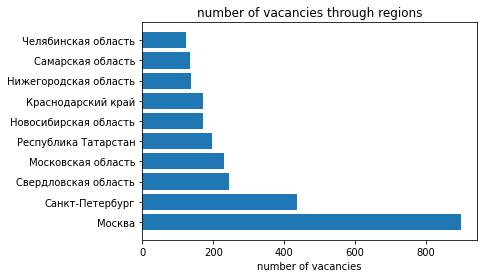

In [48]:
# попробуем выделить регионы с наибольшим числом вакансий и зарплат (топ-10 регионв и зарплат)
# регионы с наибольшим числом вакансий
import matplotlib.pyplot as plt
plt.xlabel('number of vacancies')
plt.title('number of vacancies through regions')
plt.barh(it_df['region'].value_counts().head(10).index, it_df['region'].value_counts().head(10))
plt.show()

In [ ]:
Предварительный вывод: 
    Реклама курсов должна быть в большей степени направлена на жителей указанных регионов. Сами обучающие центры могут быть
    размещены в регионах и вести обучение в дистанционном формате, ввиду меньших затрат по сравнению с Москвой, СПБ.

# Медианная зарплата по регионам

In [49]:
# переводим колонку зарплат в тип данных инт, пустые строки заменяем на ноль
dataframe['salary_json'] = dataframe['salary_json'].apply(lambda x: int(x) if x != [] else 0)
# отсеиваем из этой колонки нулевые значения и выводим посмотреть
dataframe_sal_notna = dataframe[dataframe['salary_json']>0]
dataframe_sal_notna['salary_json'].sample(10)

56886    140000
72539     44700
54378    150000
52484     55000
73329     90000
34670     32500
16581     75000
73574     70000
71305     46000
32279     85000
Name: salary_json, dtype: int64

In [50]:
# составляем список регионов топ-10 по кол-ву вакансий
list_reg = list(dataframe['region'].value_counts().head(10).index)
list_reg

['Москва',
 'Санкт-Петербург',
 'Краснодарский край',
 'Свердловская область',
 'Республика Татарстан',
 'Новосибирская область',
 'Московская область',
 'Нижегородская область',
 'Ростовская область',
 'Самарская область']

In [51]:
# оставляем в датафрейме только регионы из списка топ-10
groups = dataframe_sal_notna[dataframe_sal_notna['region'].isin(list_reg)]
# оставляем в датафрейме только вакансии из списка топа
groups = groups[groups['name'].isin(top_prof_list)]
# группируем столбцы регионов и столбец медианы зарплат
group_reg = groups.groupby('region')['salary_json'].median()
# сортируем по убыванию
group_reg = group_reg.sort_values(ascending=False)
group_reg

region
Москва                   87500.0
Московская область       80000.0
Нижегородская область    80000.0
Санкт-Петербург          70000.0
Свердловская область     70000.0
Республика Татарстан     60000.0
Ростовская область       58750.0
Самарская область        57500.0
Новосибирская область    55000.0
Краснодарский край       50000.0
Name: salary_json, dtype: float64

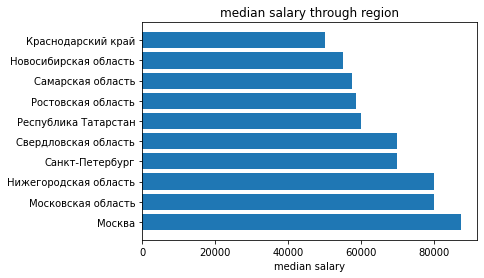

In [54]:
# отрисовываем зарплаты по топ-10 регионам на бар-даиграмме
plt.xlabel('median salary')
plt.title('median salary through region')
plt.barh(group_reg.index, group_reg)
plt.show()

In [ ]:
Предварительный вывод:
    В регионах с бОльшим спросом - выше зарплаты. Возможно введение системы постоплаты (оплата в % от полученной зарплаты после курсов)
    в регионах с более высокой зарплатой, либо с условием переезда в эти регионы.

# Штатное расписание

In [55]:
# выводим ещё раз список самых распространённых вакансий
top_prof_list

['Системный администратор',
 'Программист 1С',
 'Системный аналитик',
 'Специалист технической поддержки',
 'Аналитик',
 'Инженер-программист']

In [56]:
# формируем новые датафрймы по спискам штатного расписания (топ-5), топа вакансий (топ-10) и выводим посмотреть получившуюся
# колонку с расписанием одной из вакансий
dataframe_sch = dataframe[dataframe['schedule_json'].isin(list(dataframe['schedule_json'].value_counts().head(5).index))]
df_name_com = dataframe_sch[dataframe_sch['name'].isin(list(top_prof_list))]
df_name_com_prof = df_name_com[df_name_com['name'] == 'Системный администратор']
df_name_com_prof['schedule_json'].value_counts()

fullDay        1769
flexible         40
shift            36
remote           32
flyInFlyOut      10
Name: schedule_json, dtype: int64

In [57]:
# здесь просто задаём цвета для разных типов шттного расписания
labels = df_name_com_prof['schedule_json'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{'shift': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'fullDay': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'remote': (1.0, 0.4980392156862745, 0.054901960784313725),
 'flexible': (1.0, 0.7333333333333333, 0.47058823529411764),
 'flyInFlyOut': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)}

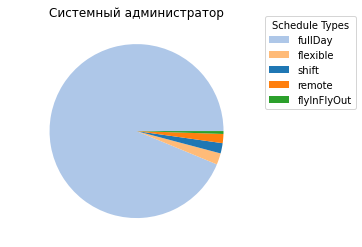

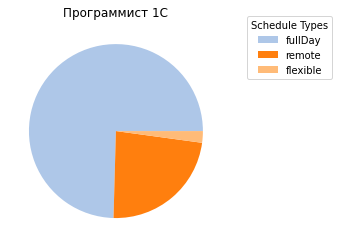

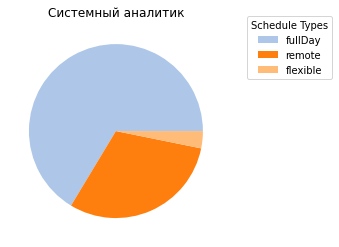

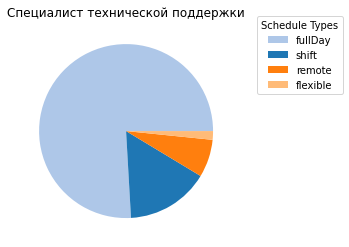

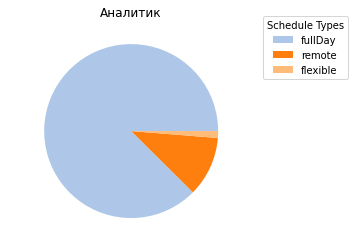

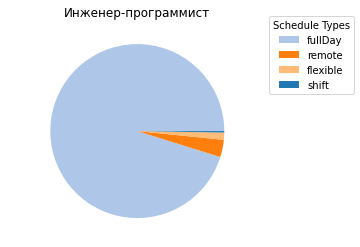

In [58]:
# перебираем созданный выше список топ-10 профессий
for i in list(top_prof_list):
#     создаём новый датафрейм, добавляем в него все сведения по каждому значению из иттерируемого списка
  df_name_com_prof = df_name_com[df_name_com['name'] == i]
# присваиваем переменной число каждого значения в колонке Тип здания
  class_counts = df_name_com_prof['schedule_json'].value_counts()
#     присваиваем переменной индексы (названия всех значений) из переменной выше
  labels = class_counts.index
# отрисовываем круговые диаграммы колонок из списка top_prof_list
  plt.title(i)
#    указываем тип диаграммы, передаём в неё параметры (значения колонки schedule_json, лэйблы-ключи и цвета к ним из словаря) 
  patches, texts = plt.pie(
      class_counts.values, 
      labels = labels, 
      colors = [colors[key] for key in labels],
      textprops=dict(color="w") 
      )
#    задаём легенду и задаём заголовок, её локацию размещения, настраиваем местоположение самой легенды
  plt.legend(patches, labels, title="Schedule Types", loc="upper center", bbox_to_anchor=(1.05, 0.05, 0.5, 1)) 
# эта команда нужна, чтобы отрисовать сразу несклько графиков при переборе  
  plt.show()

In [ ]:
Предварительный вывод:
    Для удалённой работы в большинстве случаев подходят специальности Аналитиков, программиста 1С и специалист тех. поддержки. 
    Для обучения жителей регионов больше подойдут эти специальности, так как они смогут в дальнейшем работать удалённо на 
    работодателей из СПБ и МСК.

# Нарисуем боксплоты для зарплат топ-10 вакансий

In [ ]:
# создадим датафрейм для топ-10 вакансий и ненулевых зарплат
df_top_notna = dataframe_sal_notna[dataframe_sal_notna['name'].isin(list(top_prof_list))]
df_top_notna['salary_json'].tail(10)

[Text(0.5, 0, 'Job title'),
 Text(0, 0.5, 'Salary'),
 Text(0.5, 1.0, 'Top-10 jobs salary')]

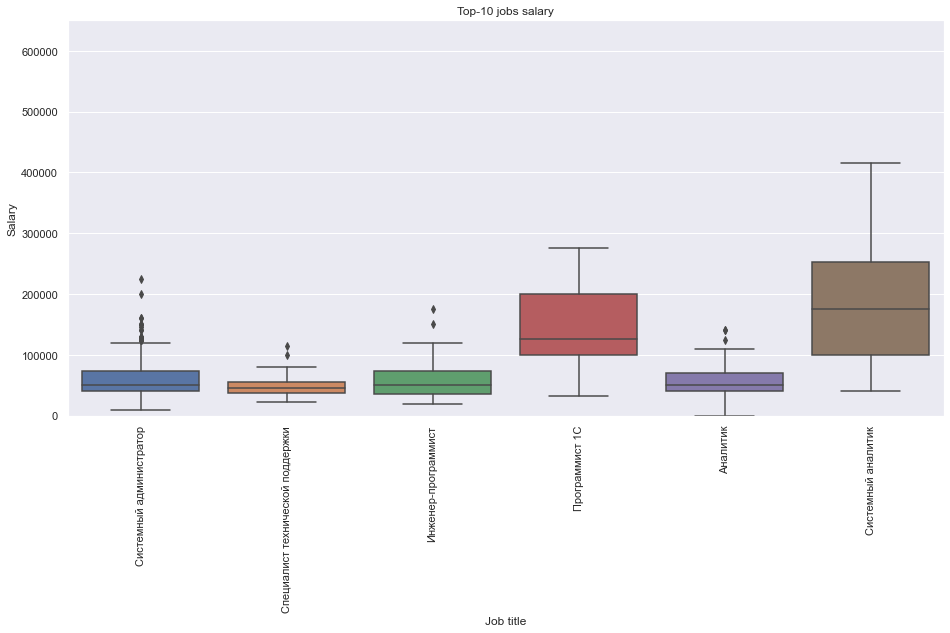

In [61]:
# используем библиотеку сиборн для отрисовки, загрузим её
import seaborn as sns
# зададим размеры графика
sns.set(rc={'figure.figsize':(15.7,7.27)})
# заполним данные и тип графика, которые будут построены
ax = sns.boxplot(x='name', y="salary_json", data=df_top_notna)
# подкорректируем размеры отображаемой области по оси Y
plt.axis(ymin=0, ymax=650000) 
# чтобы подписи оси X не сливались - повернём их на 90 градусов
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
# зададим название графика и подпишем оси
ax.set(xlabel ="Job title", ylabel = "Salary", title ='Top-10 jobs salary')

In [ ]:
Предварительный вывод:
    Цену на курсы стоит определеять, учитывая медианную зарплату по специальности. Также стоит принять во внимание себестоимость
     организации курсов и цены конкурентов. Графики медианных зарплат представлены выше для топа вакансий.